In [10]:
from Bio import SeqIO
cnt = 0
for record in SeqIO.parse("./data/uniref50.fasta", "fasta"):
    cnt +=1
    # print(record)
    # print(len(record.seq))
    # print("="*80)

In [11]:
print(cnt)

52523202


### 52523202 protein sequences in uniref50


In [2]:
import torch
model, alphabet = torch.hub.load("facebookresearch/esm:main", "esm1b_t33_650M_UR50S")

Using cache found in /root/.cache/torch/hub/facebookresearch_esm_main


In [3]:
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein2 with mask","KALTARQQEVFDLIRD<mask>ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein3",  "K A <mask> I S Q"),
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)

In [4]:
print(batch_labels)

['protein1', 'protein2', 'protein2 with mask', 'protein3']


In [9]:
for i in range(34):
    print(i)
    print(alphabet.get_tok(i))

0
<cls>
1
<pad>
2
<eos>
3
<unk>
4
L
5
A
6
G
7
V
8
S
9
E
10
R
11
T
12
I
13
D
14
P
15
K
16
Q
17
N
18
F
19
Y
20
M
21
H
22
W
23
C
24
X
25
B
26
U
27
Z
28
O
29
.
30
-
31
<null_1>
32
<mask>
33


IndexError: list index out of range

In [4]:
print(batch_strs)

['MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG', 'KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE', 'KALTARQQEVFDLIRD<mask>ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE', 'K A <mask> I S Q']


In [5]:
print(batch_tokens)

tensor([[ 0, 20, 15, 11,  7, 10, 16,  9, 10,  4, 15,  8, 12,  7, 10, 12,  4,  9,
         10,  8, 15,  9, 14,  7,  8,  6,  5, 16,  4,  5,  9,  9,  4,  8,  7,  8,
         10, 16,  7, 12,  7, 16, 13, 12,  5, 19,  4, 10,  8,  4,  6, 19, 17, 12,
          7,  5, 11, 14, 10,  6, 19,  7,  4,  5,  6,  6,  2,  1,  1,  1,  1,  1,
          1],
        [ 0, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 21,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9,
          2],
        [ 0, 15,  5,  4, 11,  5, 10, 16, 16,  9,  7, 18, 13,  4, 12, 10, 13, 32,
         12,  8, 16, 11,  6, 20, 14, 14, 11, 10,  5,  9, 12,  5, 16, 10,  4,  6,
         18, 10,  8, 14, 17,  5,  5,  9,  9, 21,  4, 15,  5,  4,  5, 10, 15,  6,
          7, 12,  9, 12,  7,  8,  6,  5,  8, 10,  6, 12, 10,  4,  4, 16,  9,  9,


In [22]:
key = 33
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[key], return_contacts=True)
token_representations = results["representations"][key]

In [24]:
print(token_representations.shape)

torch.Size([4, 73, 1280])


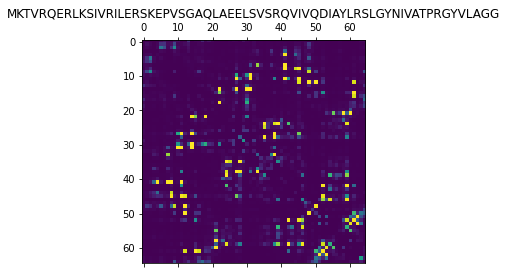

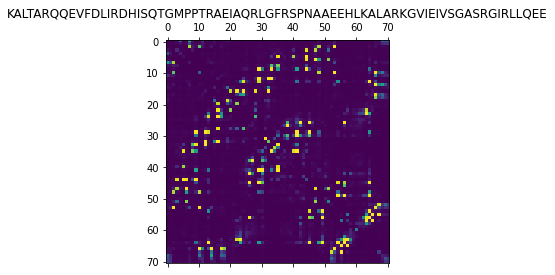

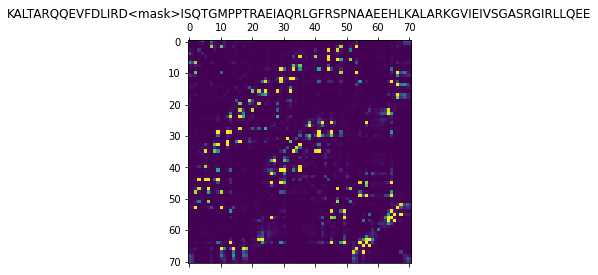

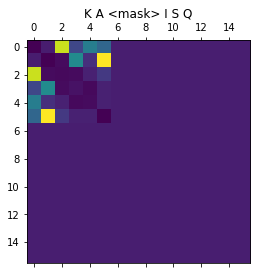

In [10]:
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))

# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)
    plt.show()

In [ ]:
# CFG = {'WINDOW':12}
# epitope = [1,2,3,4,5,6]
# antigen = [0,0,1,2,3,4,5,6,0,0,0,0]
# s_p = 3
# e_p = 8
# antigen_pad = [26 for _ in range(CFG['WINDOW'])]
        
# epitope_len = len(epitope)
        
# s_p = int(s_p)
# e_p = int(e_p)
# start_p = s_p - int(CFG['WINDOW']/2 - (epitope_len//2))-1
# end_p = e_p + int(CFG['WINDOW']/2 - (epitope_len//2 + epitope_len%2) + CFG['WINDOW']%2)
        
# if start_p < 0:
#     start_p = 0
# if end_p > len(antigen):
#     end_p = len(antigen)


# # antigen_pad[int(CFG['WINDOW']/2 - (epitope_len//2) - (s_p-start_p) + 1):int(CFG['WINDOW']/2 - (epitope_len//2))] = antigen[start_p:s_p -1]
# # antigen_pad[int(CFG['WINDOW']/2 + (epitope_len//2 + epitope_len%2)):int(CFG['WINDOW']/2 + (epitope_len//2 + epitope_len%2))+ (end_p - e_p)] = antigen[e_p:end_p]
# # antigen_pad[int(CFG['WINDOW']/2 - (epitope_len//2)) : int(CFG['WINDOW']/2 + (epitope_len//2 + epitope_len%2))] = epitope


# # antigen_pad[int(CFG['WINDOW']/2 + (epitope_len//2 + epitope_len%2)):int(CFG['WINDOW']/2 + (epitope_len//2 + epitope_len%2))+ (end_p - e_p)] = antigen[e_p:end_p]
# # antigen_pad[int(CFG['WINDOW']/2 - (epitope_len//2)) : int(CFG['WINDOW']/2 + (epitope_len//2 + epitope_len%2))] = epitope
# print(antigen_pad)
# print(len(antigen_pad))
        